In [1]:
# Importing the required module
# TODO: Use other plotting library instead?
# TODO: Check which libraries remain relevant at the end.
import numpy as np

import pandas as pd


import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objs as go

import os
# dirname = os.path.dirname()

# Define own working directory here 
# TODO: Is there a dynamic way to achieve this, without requiring manual copy-paste of directory?
os.chdir(r"/Users/philipp/econ/experiment_model_persuasion/")


pwd = os.getcwd()
pwd

'/Users/philipp/econ/experiment_model_persuasion'

In [3]:
# Set parameters
T=100

#Generate timeline

t = np.arange(0,T,1,dtype=int)

# Set std and switching probability

var_errors = 30
p = 0.5

# Generate (stochastic) trend:

seed = 12345

rng = np.random.default_rng(seed)
draw_rand_bin = rng.binomial(1, p, size=None)

errors = rng.normal(0, var_errors, T)




# Set the trend component
c = .5

# Generate trend shift (first up, then down, or vice versa)

trend = np.array([0,0])

if draw_rand_bin == 0:
    trend = np.array([c,-c])
elif draw_rand_bin == 1:
    trend = np.array([c,-c])    


# Determine whether there is a trend shift
# For shift at t=0, this is equivalent to no shift (i.e., second part of trend is used throughout).

# Set up shifting probabilities
p_shift_at_0 = 0.5

equal_prob_t80= (1-  p_shift_at_0) / (79)

p_shift_at_t = np.full(80, equal_prob_t80)


p_shift_at_t[0] = p_shift_at_0

p_shift_at_t

check_sum = np.sum(p_shift_at_t)
# check_sum

In [4]:
trend_shift = np.random.choice(80, size=None, replace=True, p=p_shift_at_t.tolist())

# trend_shift

In [6]:

trend_shift = np.random.choice(80, size=None, replace=True)

trend_shift

# generate trend vector including shift

trend_with_shift = np.full(100,c)
for i in range(0,100):
    if i <= trend_shift:
        trend_with_shift[i] = trend[0]
    elif i > trend_shift:
        trend_with_shift[i] = trend[1]

trend_with_shift


# run cumulative trend, errors

cum_sum_trend = np.cumsum(trend_with_shift)

cum_sum_errors = np.cumsum(errors)

# shift y upwards by 100 to "normalize" stock
y = cum_sum_trend + cum_sum_errors + 100





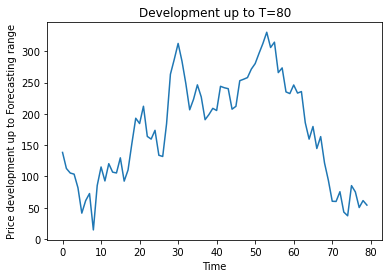

In [5]:


# TODO: Get good handle on plotting.
# Currently using matplotlib


 
# plotting the points
plt.plot(t[0:80], y[0:80])
 
# naming the x axis
plt.xlabel('Time')
# naming the y axis
plt.ylabel('Price development up to Forecasting range')
 
# giving a title to my graph
plt.title('Development up to T=80')
 
# function to show the plot
plt.show()

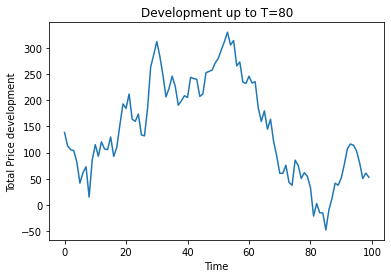

In [6]:
# plotting the points
plt.plot(t[0:100], y[0:100])
 
# naming the x axis
plt.xlabel('Time')
# naming the y axis
plt.ylabel('Total Price development')
 
# giving a title to my graph
plt.title('Development up to T=80')
 
# function to show the plot
plt.show()

In [19]:
#t.shape
# y.shape

# combined_array = np.concatenate((t, y),axis=0, out=None, dtype=None, casting="same_kind")

# combined_array.shape

In [7]:
stacked_array= np.stack((t, y), axis=-1)
data = pd.DataFrame(stacked_array).rename(columns={0: "Time", 1: "Stock price"})

data.iloc[50]


Time            50.000000
Stock price    237.234074
Name: 50, dtype: float64

In [8]:
# TODO: Make graphs, regressions look nice.
# Challenge: retain uniformity in order not to bias 
# experimental persuaders/receivers.

# TODO: Does plotly require pandas dataframes, or are numpy-array fine, too?
# Documentation indicates generally pd. fine.

# TODO: Find a dynamic and consistent way to set the axes (y, mostly)
# 

shift_point = 40

fig = px.line(data, x="Time", 
                        y="Stock price",
                        labels={'number_obs':'Number of Observations', 'runtime':'runtime'},
                        title='Development of a stock price',
                        )
fig.update_layout(paper_bgcolor='#fff' )
fig.update_layout(plot_bgcolor='#fff' )

fig.add_shape(type="line",
    xref="x", yref="y",
    x0=shift_point, y0=-100, x1=shift_point, y1=300,
    line=dict(
        color="LightSeaGreen",
        width=3,
    ),
)

fig.add_shape(type="line",
    xref="x", yref="y",
    x0=shift_point, y0=data.iat[shift_point,1], x1=80, y1=data.iat[80,1],
    line=dict(
        color="LightSeaGreen",
        width=3,
    ),
)

fig.add_shape(type="line",
    xref="x", yref="y",
    x0=0, y0=data.iat[0,1], x1=shift_point, y1=data.iat[shift_point,1],
    line=dict(
        color="LightSeaGreen",
        width=3,
    ),
)

# fig.to_image(format="png", engine="kaleido")

fig.write_image(pwd + "/img/fig_test_{}.jpg".format(shift_point), engine='kaleido')



NameError: name 'px' is not defined

In [8]:
#from gen_neutral_graphs import gen_neutral_graphs

# import plotly.express as px
from neutral_graphs import *

T_model = 40 

t_list_model = np.arange(0,T_model,1,dtype=int)

# neutral_graphs.gen_neutral_graphs(data, t_list_model, 5)

gen_neutral_graphs(data, t_list_model, 5,pwd)

